### Bike Buyers Dataset - EDA

**Exploratory Data Analysis** refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

![](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process.png)

In [1]:
library('ggvis')
library('tidyverse')
library('ggplot2')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Read the dataset and get high level understanding

In [2]:
bike_buyers = read.csv('../input/bike-buyers/bike_buyers.csv', header=T, na.strings='')
head(bike_buyers)

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>
1,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
2,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
3,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,24381,Single,NA,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
5,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
6,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [3]:
class(bike_buyers)

[1] "data.frame"

In [4]:
str(bike_buyers)

'data.frame':	1000 obs. of  13 variables:
 $ ID              : int  12496 24107 14177 24381 25597 13507 27974 19364 22155 19280 ...
 $ Marital.Status  : Factor w/ 2 levels "Married","Single": 1 1 1 2 2 1 2 1 NA 1 ...
 $ Gender          : Factor w/ 2 levels "Female","Male": 1 2 2 NA 2 1 2 2 2 2 ...
 $ Income          : int  40000 30000 80000 70000 30000 10000 160000 40000 20000 NA ...
 $ Children        : int  1 3 5 0 0 2 2 1 2 2 ...
 $ Education       : Factor w/ 5 levels "Bachelors","Graduate Degree",..: 1 4 4 1 1 4 3 1 5 4 ...
 $ Occupation      : Factor w/ 5 levels "Clerical","Management",..: 5 1 4 4 1 3 2 5 1 3 ...
 $ Home.Owner      : Factor w/ 2 levels "No","Yes": 2 2 1 2 1 2 NA 2 2 2 ...
 $ Cars            : int  0 1 2 1 0 0 4 0 2 1 ...
 $ Commute.Distance: Factor w/ 5 levels "0-1 Miles","1-2 Miles",..: 1 1 4 5 1 2 1 1 5 1 ...
 $ Region          : Factor w/ 3 levels "Europe","North America",..: 1 1 1 3 1 1 3 1 3 1 ...
 $ Age             : int  42 43 60 41 36 50 33 43 58 NA ...
 

In [5]:
summary(bike_buyers)

       ID        Marital.Status    Gender        Income          Children   
 Min.   :11000   Married:535    Female:489   Min.   : 10000   Min.   :0.00  
 1st Qu.:15291   Single :458    Male  :500   1st Qu.: 30000   1st Qu.:0.00  
 Median :19744   NA's   :  7    NA's  : 11   Median : 60000   Median :2.00  
 Mean   :19966                               Mean   : 56268   Mean   :1.91  
 3rd Qu.:24471                               3rd Qu.: 70000   3rd Qu.:3.00  
 Max.   :29447                               Max.   :170000   Max.   :5.00  
                                             NA's   :6        NA's   :8     
               Education            Occupation  Home.Owner      Cars      
 Bachelors          :306   Clerical      :177   No  :314   Min.   :0.000  
 Graduate Degree    :174   Management    :173   Yes :682   1st Qu.:1.000  
 High School        :179   Manual        :119   NA's:  4   Median :1.000  
 Partial College    :265   Professional  :276              Mean   :1.455  
 Partial 

In [6]:
levels(bike_buyers$Gender)

[1] "Female" "Male"

### Assign factors to string values

In [7]:
bike_buyers$Marital.Status <- as.factor(bike_buyers$Marital.Status)
bike_buyers$Gender <- as.factor(bike_buyers$Gender)
bike_buyers$Home.Owner <- as.factor(bike_buyers$Home.Owner)
bike_buyers$Purchased.Bike <- as.factor(bike_buyers$Purchased.Bike)

In [8]:
str(bike_buyers)

'data.frame':	1000 obs. of  13 variables:
 $ ID              : int  12496 24107 14177 24381 25597 13507 27974 19364 22155 19280 ...
 $ Marital.Status  : Factor w/ 2 levels "Married","Single": 1 1 1 2 2 1 2 1 NA 1 ...
 $ Gender          : Factor w/ 2 levels "Female","Male": 1 2 2 NA 2 1 2 2 2 2 ...
 $ Income          : int  40000 30000 80000 70000 30000 10000 160000 40000 20000 NA ...
 $ Children        : int  1 3 5 0 0 2 2 1 2 2 ...
 $ Education       : Factor w/ 5 levels "Bachelors","Graduate Degree",..: 1 4 4 1 1 4 3 1 5 4 ...
 $ Occupation      : Factor w/ 5 levels "Clerical","Management",..: 5 1 4 4 1 3 2 5 1 3 ...
 $ Home.Owner      : Factor w/ 2 levels "No","Yes": 2 2 1 2 1 2 NA 2 2 2 ...
 $ Cars            : int  0 1 2 1 0 0 4 0 2 1 ...
 $ Commute.Distance: Factor w/ 5 levels "0-1 Miles","1-2 Miles",..: 1 1 4 5 1 2 1 1 5 1 ...
 $ Region          : Factor w/ 3 levels "Europe","North America",..: 1 1 1 3 1 1 3 1 3 1 ...
 $ Age             : int  42 43 60 41 36 50 33 43 58 NA ...
 

In [9]:
colSums(is.na(bike_buyers))

ID   Marital.Status           Gender           Income 
               0                7               11                6 
        Children        Education       Occupation       Home.Owner 
               8                0                0                4 
            Cars Commute.Distance           Region              Age 
               9                0                0                8 
  Purchased.Bike 
               0

In [10]:
summary(bike_buyers)

       ID        Marital.Status    Gender        Income          Children   
 Min.   :11000   Married:535    Female:489   Min.   : 10000   Min.   :0.00  
 1st Qu.:15291   Single :458    Male  :500   1st Qu.: 30000   1st Qu.:0.00  
 Median :19744   NA's   :  7    NA's  : 11   Median : 60000   Median :2.00  
 Mean   :19966                               Mean   : 56268   Mean   :1.91  
 3rd Qu.:24471                               3rd Qu.: 70000   3rd Qu.:3.00  
 Max.   :29447                               Max.   :170000   Max.   :5.00  
                                             NA's   :6        NA's   :8     
               Education            Occupation  Home.Owner      Cars      
 Bachelors          :306   Clerical      :177   No  :314   Min.   :0.000  
 Graduate Degree    :174   Management    :173   Yes :682   1st Qu.:1.000  
 High School        :179   Manual        :119   NA's:  4   Median :1.000  
 Partial College    :265   Professional  :276              Mean   :1.455  
 Partial 

### Viewing trends in attributes with NA values

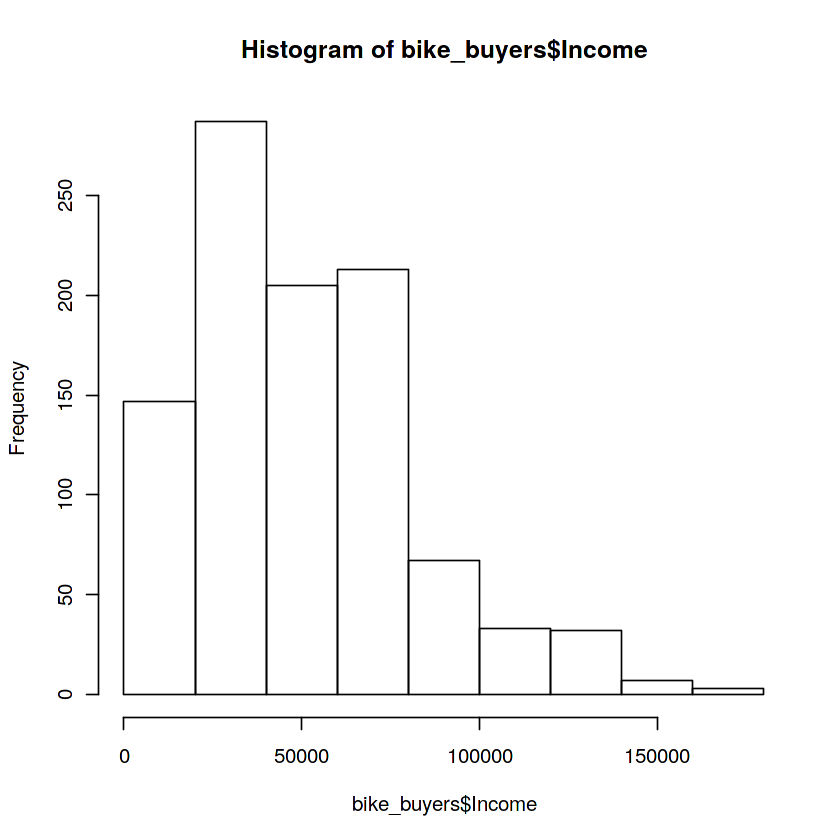

In [11]:
hist(bike_buyers$Income)

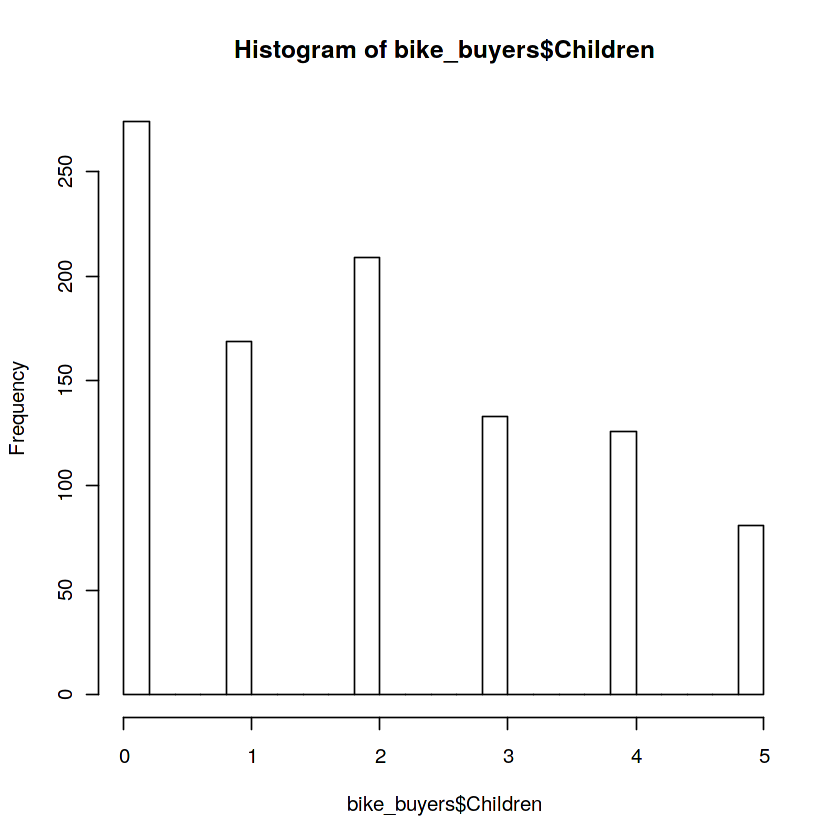

In [12]:
hist(bike_buyers$Children, breaks = 20)

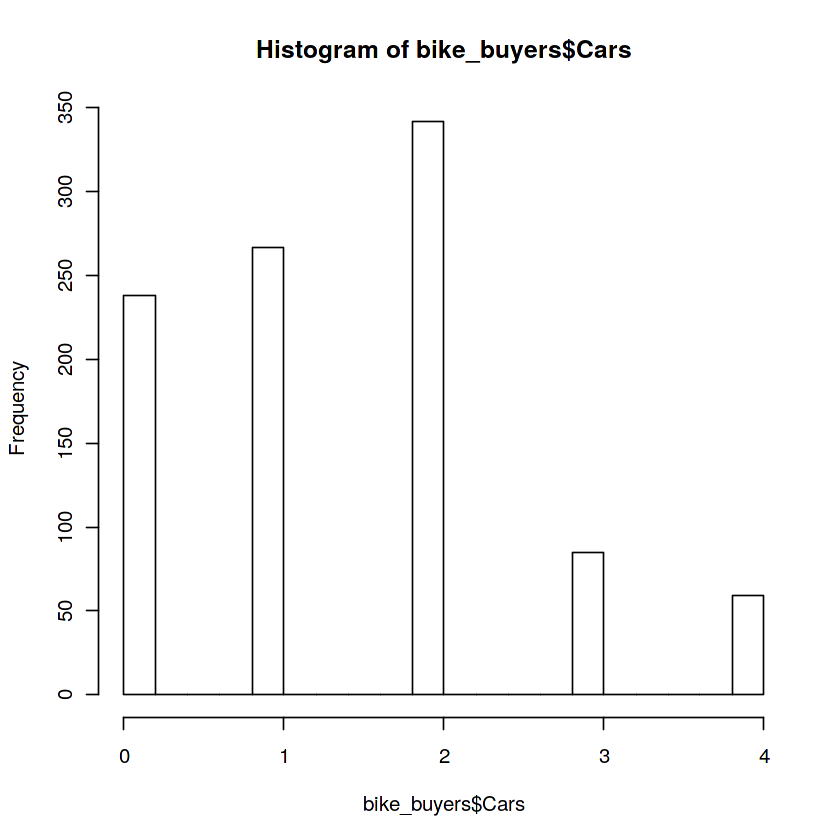

In [13]:
hist(bike_buyers$Cars, breaks = 15)

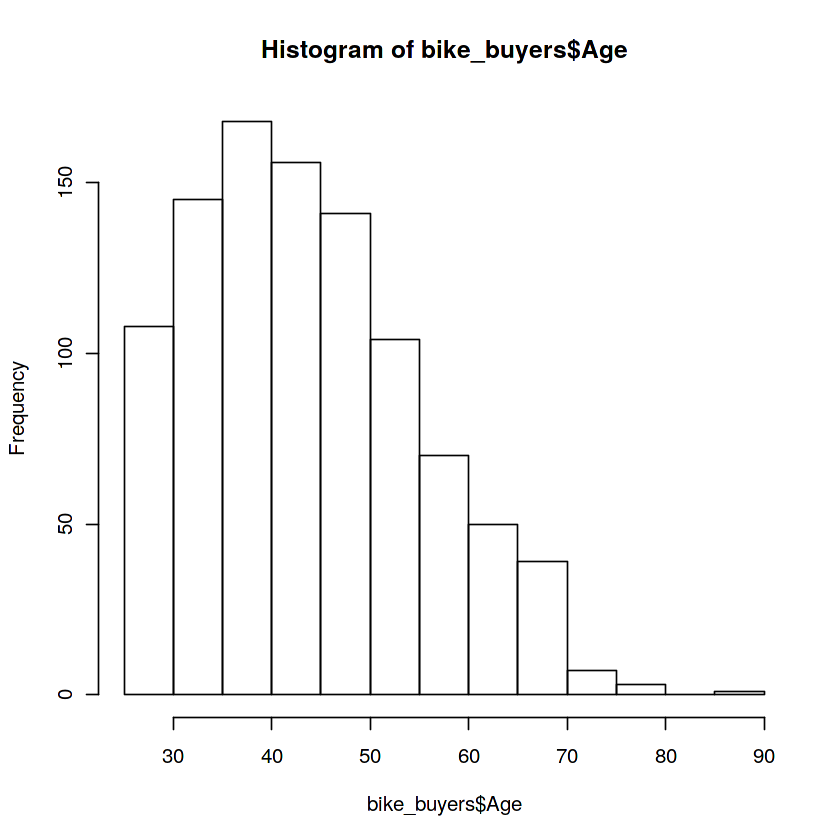

In [14]:
hist(bike_buyers$Age)

### Dealing with NA values

Since, the distribution of Income and Age is left-skewed. We will impute median values

In [15]:
median(na.omit((bike_buyers$Income)))
median(na.omit((bike_buyers$Age))) 

[1] 60000

[1] 43

In [16]:
bike_buyers_clean <- bike_buyers
colSums(is.na(bike_buyers_clean))

ID   Marital.Status           Gender           Income 
               0                7               11                6 
        Children        Education       Occupation       Home.Owner 
               8                0                0                4 
            Cars Commute.Distance           Region              Age 
               9                0                0                8 
  Purchased.Bike 
               0

In [17]:
# Income replaced with Median
bike_buyers_clean$Income[is.na(bike_buyers_clean$Income)] <- 
  median(na.omit((bike_buyers$Income)))

# Age replaced with Median
bike_buyers_clean$Age[is.na(bike_buyers_clean$Age)] <- 
  median(na.omit((bike_buyers$Age)))

colSums(is.na(bike_buyers_clean))

ID   Marital.Status           Gender           Income 
               0                7               11                0 
        Children        Education       Occupation       Home.Owner 
               8                0                0                4 
            Cars Commute.Distance           Region              Age 
               9                0                0                0 
  Purchased.Bike 
               0

### Mode function

Since mode is not an inbuilt function in R, we write a function which calculates the maximum frequency of unique values in every column.

In [18]:
get_mode <- function(x) {                 
  unique_x <- unique(x)
  tabulate_x <- tabulate(match(x, unique_x))
  unique_x[tabulate_x == max(tabulate_x)]
}

In [19]:
# Marital Status replaced with Mode
bike_buyers_clean$Marital.Status[is.na(bike_buyers_clean$Marital.Status)] <- 
  get_mode(bike_buyers$Marital.Status)

# Gender replaced with Mode
bike_buyers_clean$Gender[is.na(bike_buyers_clean$Gender)] <- 
  get_mode(bike_buyers$Gender)

# Children replaced with Mode
bike_buyers_clean$Children[is.na(bike_buyers_clean$Children)] <- 
  get_mode(bike_buyers$Children)

# Home Owner replaced with Mode
bike_buyers_clean$Home.Owner[is.na(bike_buyers_clean$Home.Owner)] <- 
  get_mode(bike_buyers$Home.Owner)

colSums(is.na(bike_buyers_clean))

ID   Marital.Status           Gender           Income 
               0                0                0                0 
        Children        Education       Occupation       Home.Owner 
               0                0                0                0 
            Cars Commute.Distance           Region              Age 
               9                0                0                0 
  Purchased.Bike 
               0

In [20]:
# Cars replaced with Mean
bike_buyers_clean$Cars[is.na(bike_buyers_clean$Cars)] <- 
  mean(bike_buyers$Cars, na.rm = TRUE)

colSums(is.na(bike_buyers_clean))

ID   Marital.Status           Gender           Income 
               0                0                0                0 
        Children        Education       Occupation       Home.Owner 
               0                0                0                0 
            Cars Commute.Distance           Region              Age 
               0                0                0                0 
  Purchased.Bike 
               0

 ### Save clean dataframe

In [21]:
write.csv(bike_buyers_clean,"bike_buyers_clean.csv", quote = FALSE, row.names = TRUE)

In [22]:
bike_buyers <- bike_buyers_clean

### Bar Plot 

A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

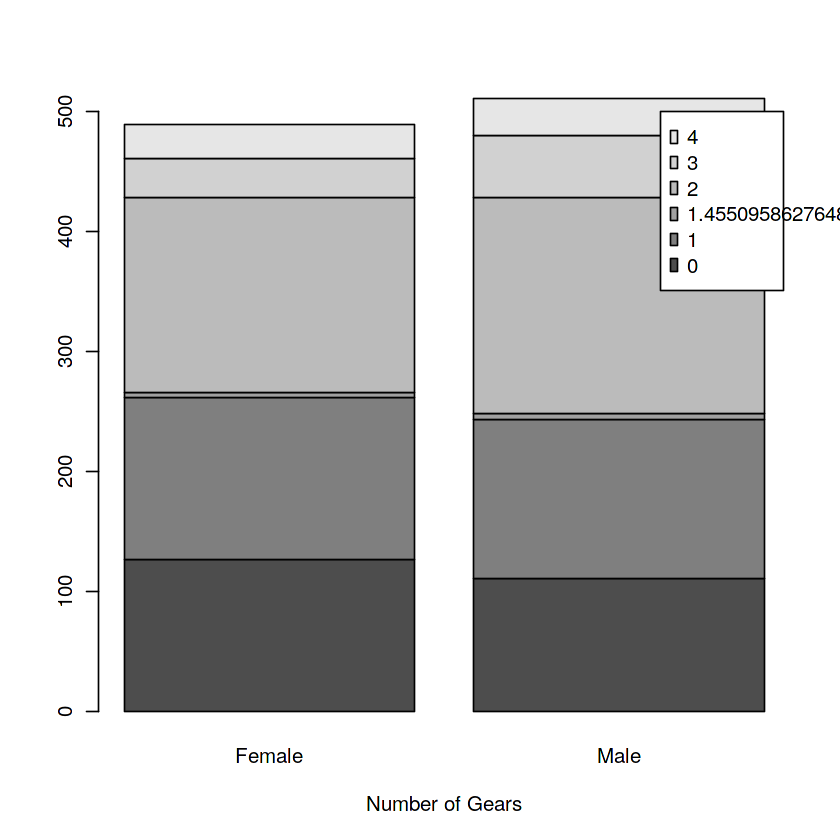

In [23]:
counts <- table(bike_buyers$Cars, bike_buyers$Gender)
barplot(counts, main = '',
        xlab="Number of Gears",
        legend = rownames(counts))

### Scatter Plot

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

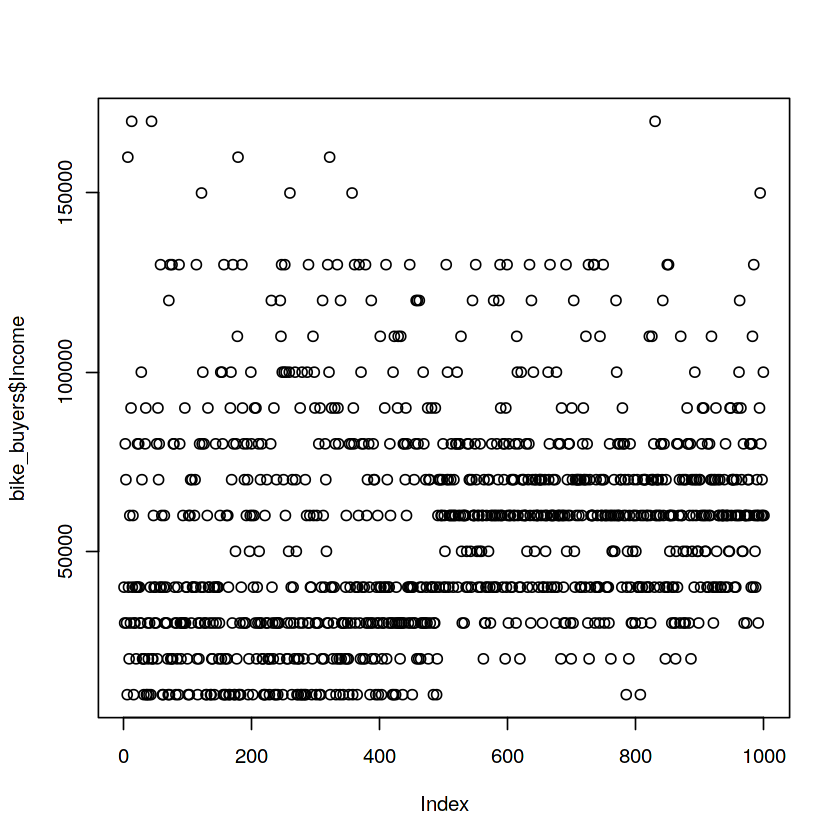

In [24]:
plot(bike_buyers$Income, type= "p")

### Histogram

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



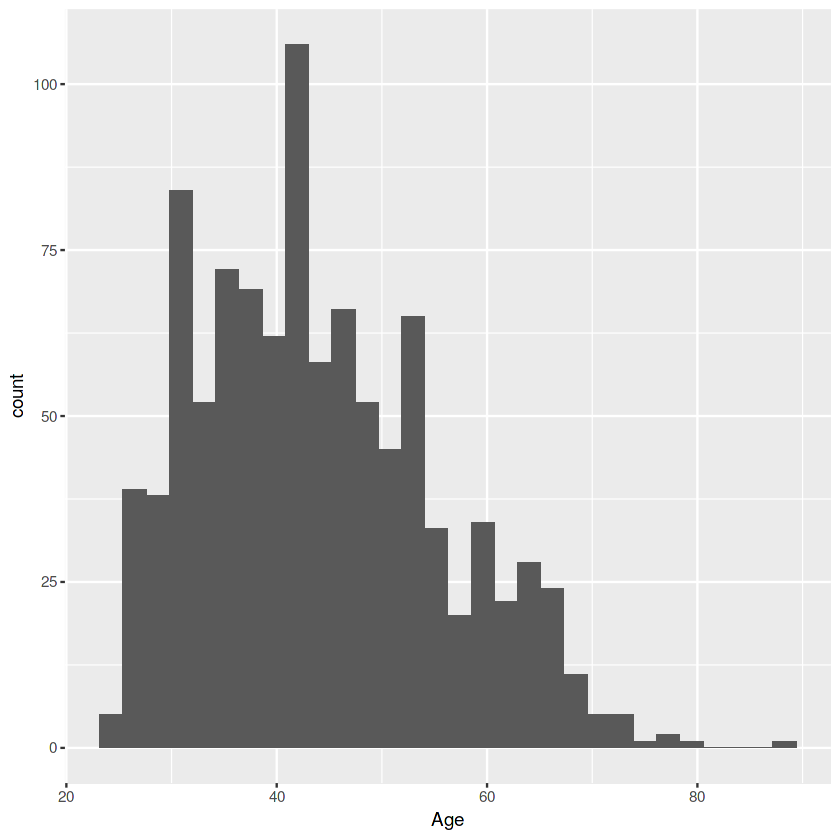

In [25]:
ggplot(bike_buyers, aes(x = Age)) +
  geom_histogram()

### Density Plot

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable (see more). It is a smoothed version of the histogram and is used in the same concept.

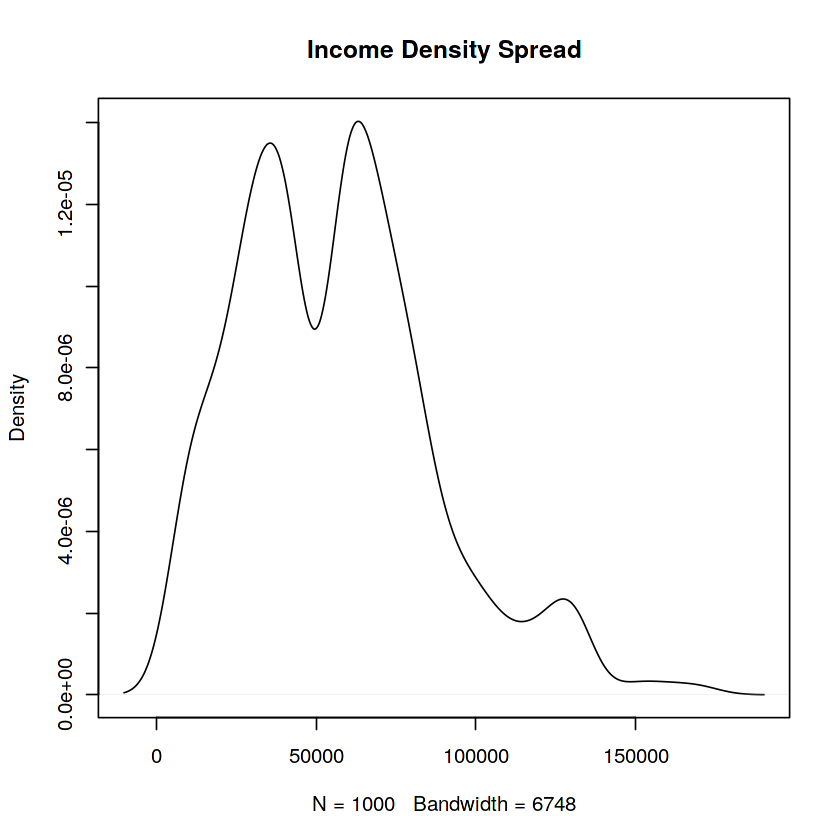

In [26]:
plot(density(bike_buyers$Income), main='Income Density Spread')

### Exploring ggplot library

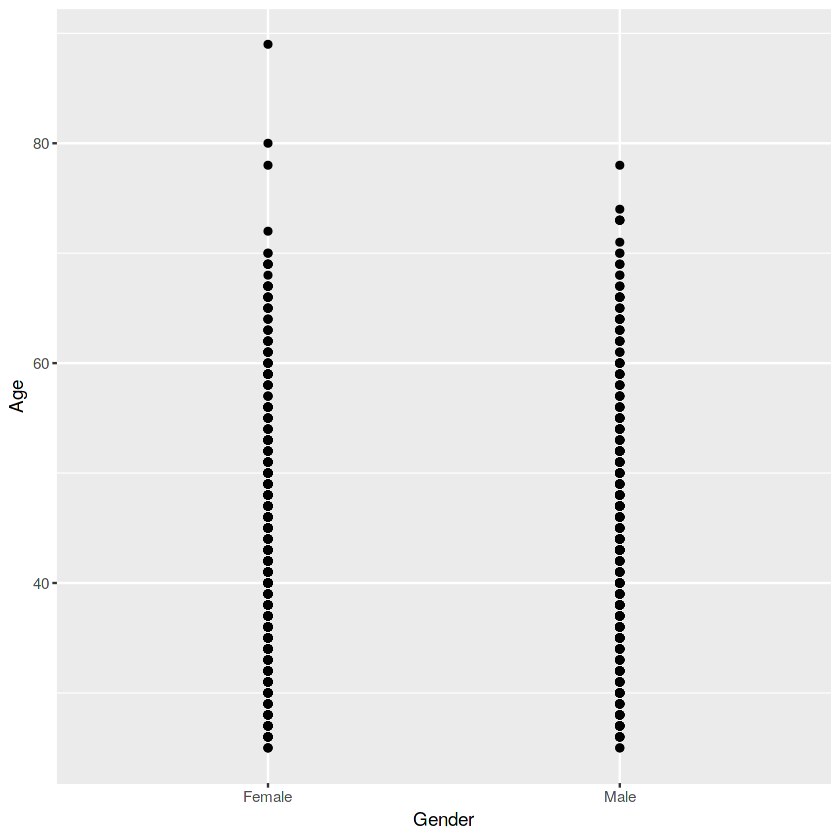

In [27]:
ggplot(bike_buyers,
       aes(y = Age, x = Gender)) +
  geom_point()

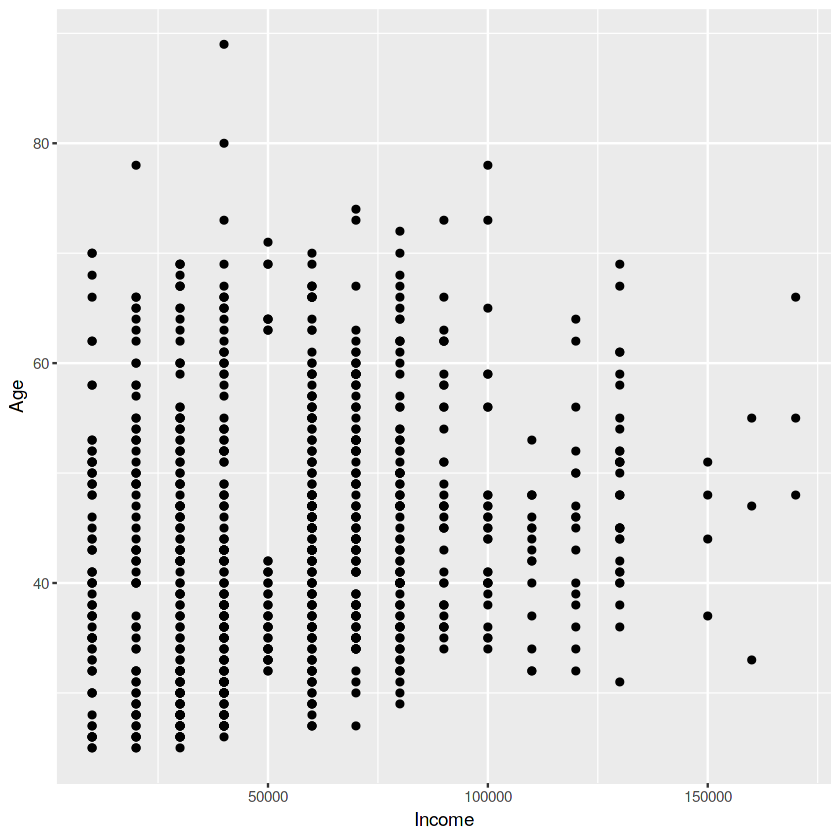

In [28]:
ggplot(bike_buyers,
       aes(y = Age, x = Income)) +
  geom_point()

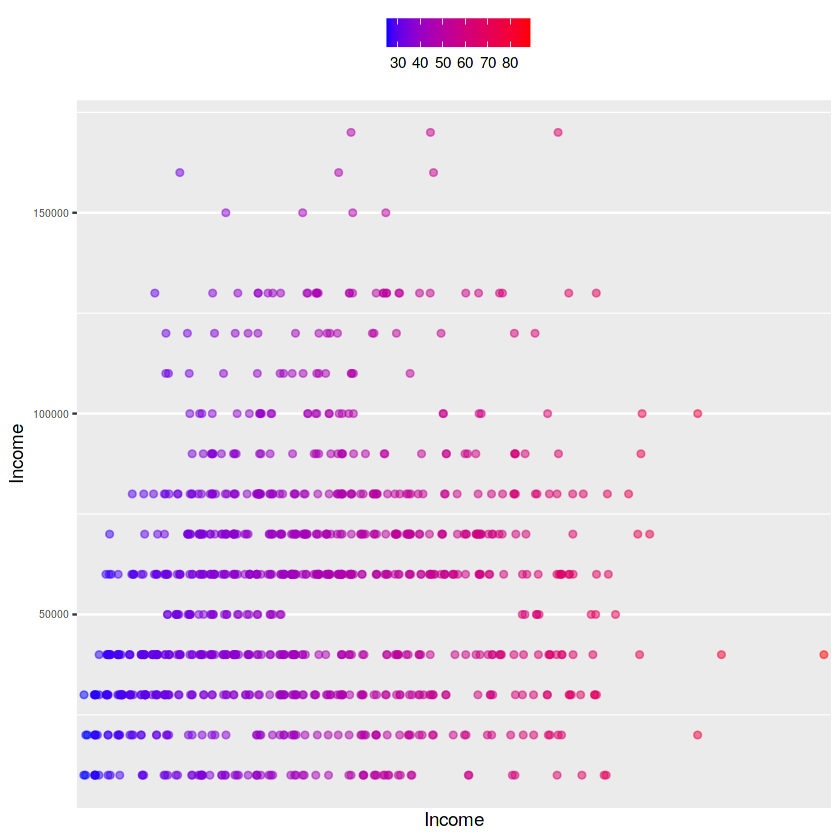

In [29]:
p3 <- ggplot(bike_buyers,
             aes(x = Age,
                 y = Income)) + 
  theme(legend.position="top",
        axis.text=element_text(size = 6))
p4 <- p3 + geom_point(aes(color = Age),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0))
p4 +
  scale_x_discrete(name="Income") +
  scale_color_continuous(name="", low = "blue", high = "red")

### Trend Plot

Trend plots are used to illustrate how a random variable may change over time (e.g. sales, exchange rates, stick prices). In order to create a Trend plot one must first have defined a set of cells as an input or output array.

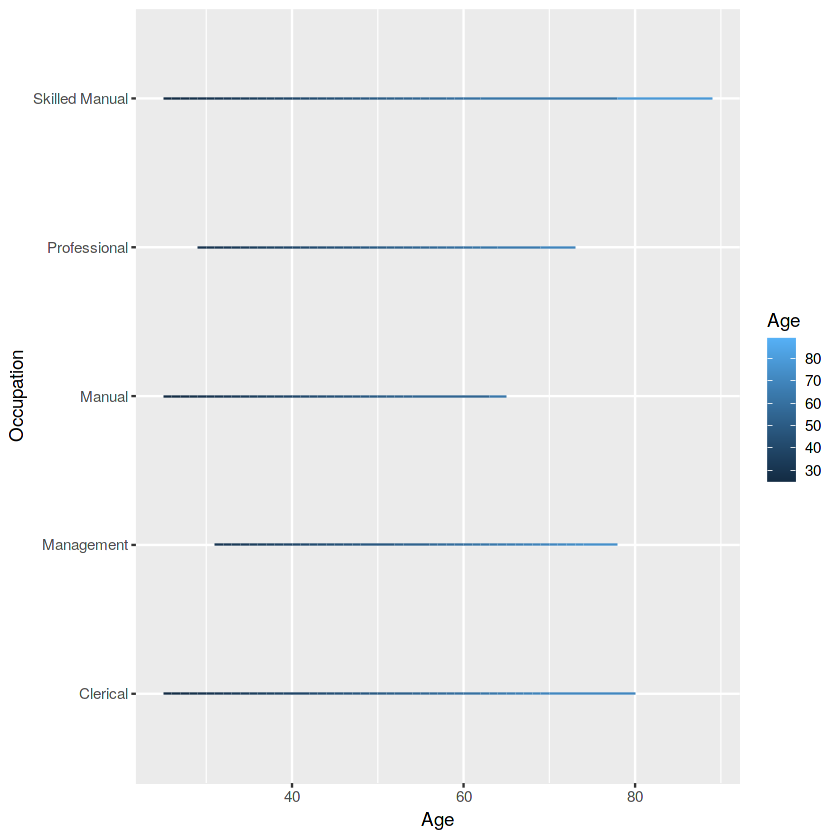

In [30]:
p5 <- ggplot(bike_buyers, aes(x = Age, y = Occupation))
p5 + geom_line(aes(color = Age))  

### Faceting



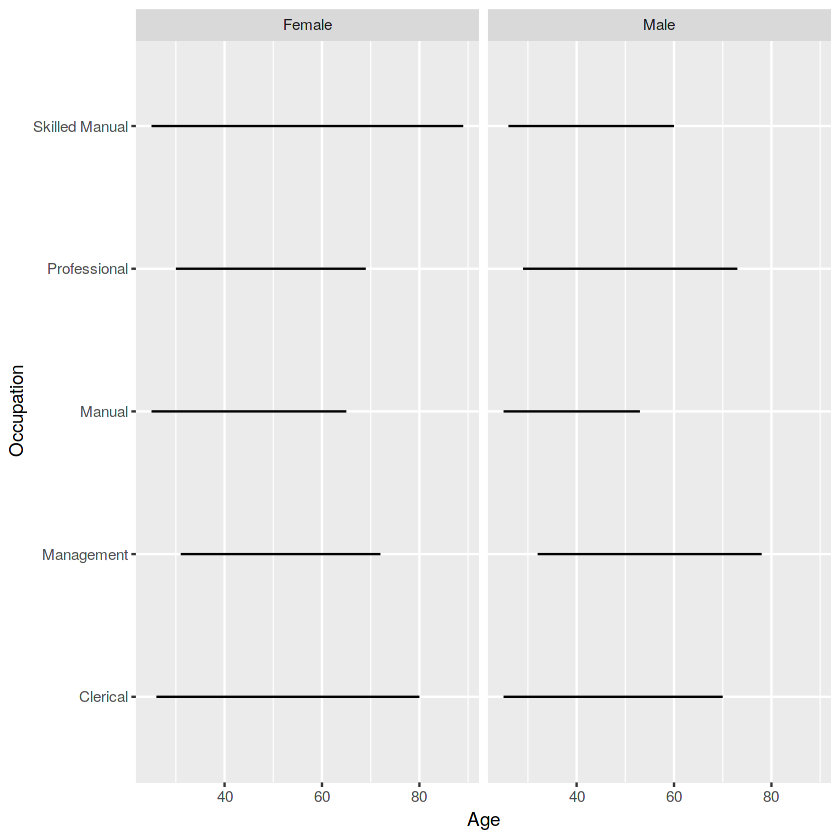

In [31]:
(p5 <- p5 + geom_line() +
    facet_wrap(~Gender, ncol = 10))

### Box Plots

A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

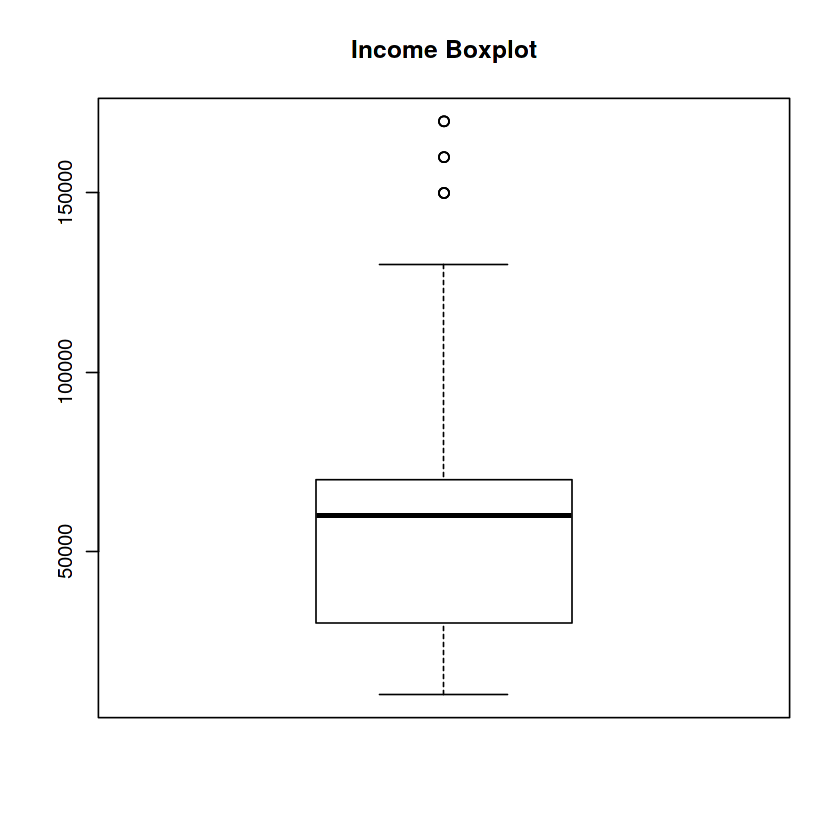

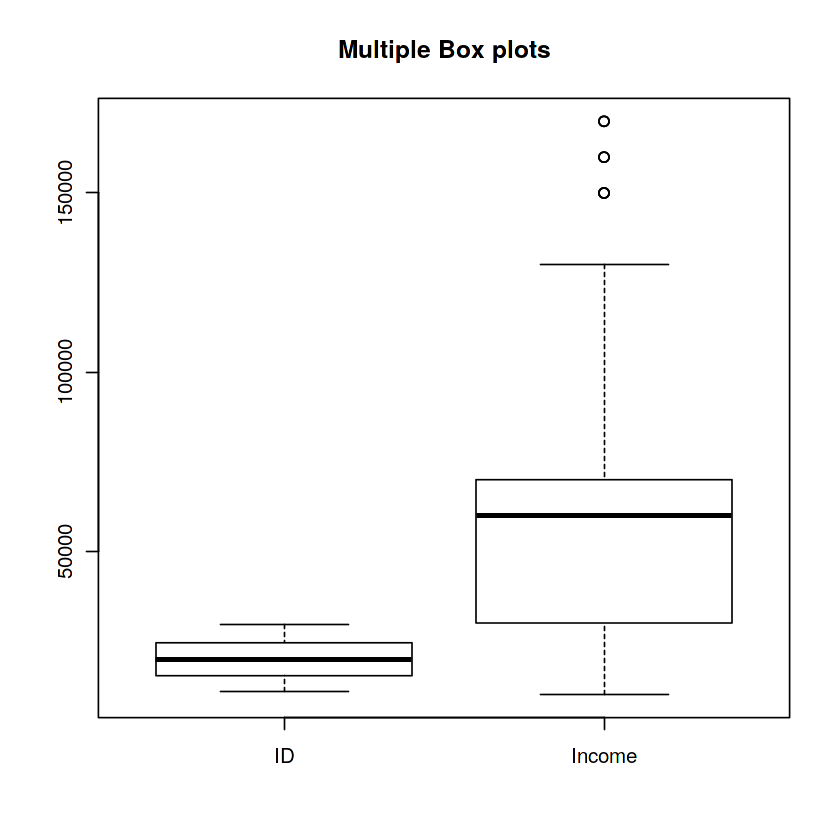

In [32]:
boxplot(bike_buyers$Income, main = 'Income Boxplot')
boxplot(bike_buyers[,c(1,4)], main='Multiple Box plots')

### Outlier Treatment

Statisticians often come across outliers when working with datasets and it is important to deal with them because of how significantly they can distort a statistical model. Your dataset may have values that are distinguishably different from most other values, these are referred to as outliers. Usually, an outlier is an anomaly that occurs due to measurement errors but in other cases, it can occur because the experiment being observed experiences momentary but drastic turbulence. In either case, it
is important to deal with outliers because they can adversely impact the accuracy of your results, especially in regression models.

Outliers can be dangerous for your data science activities because most statistical parameters such as mean, standard deviation and correlation are highly sensitive to outliers. Consequently, any statistical calculation based on these parameters is affected by the presence of outliers.

 [1] 160000 170000 170000 150000 160000 150000 160000 150000 170000 150000


[1]   7  13  44 122 179 260 322 357 830 994

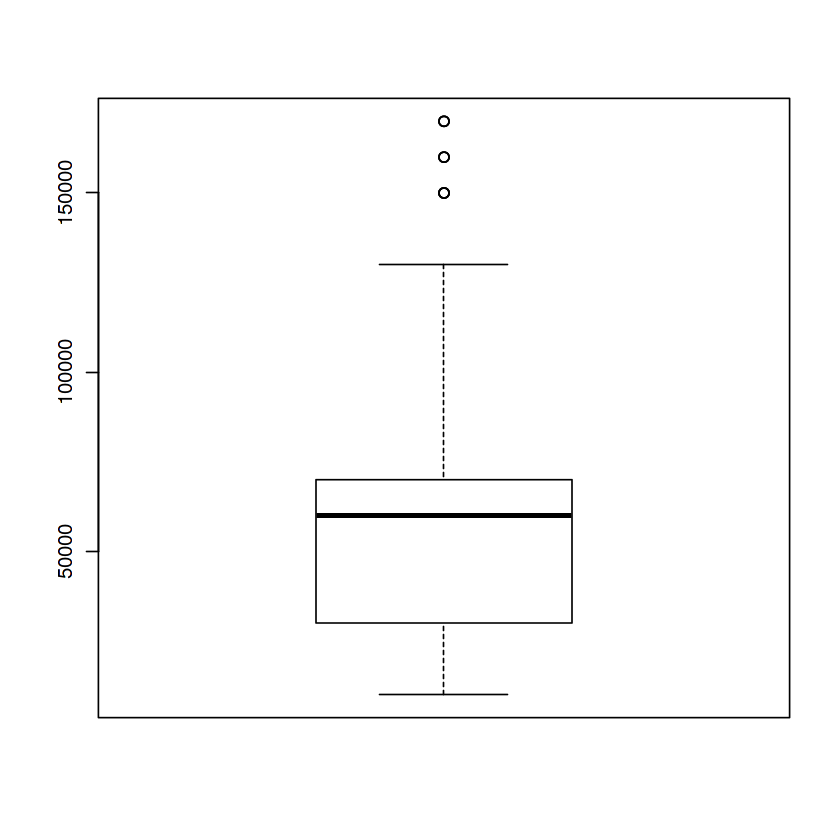

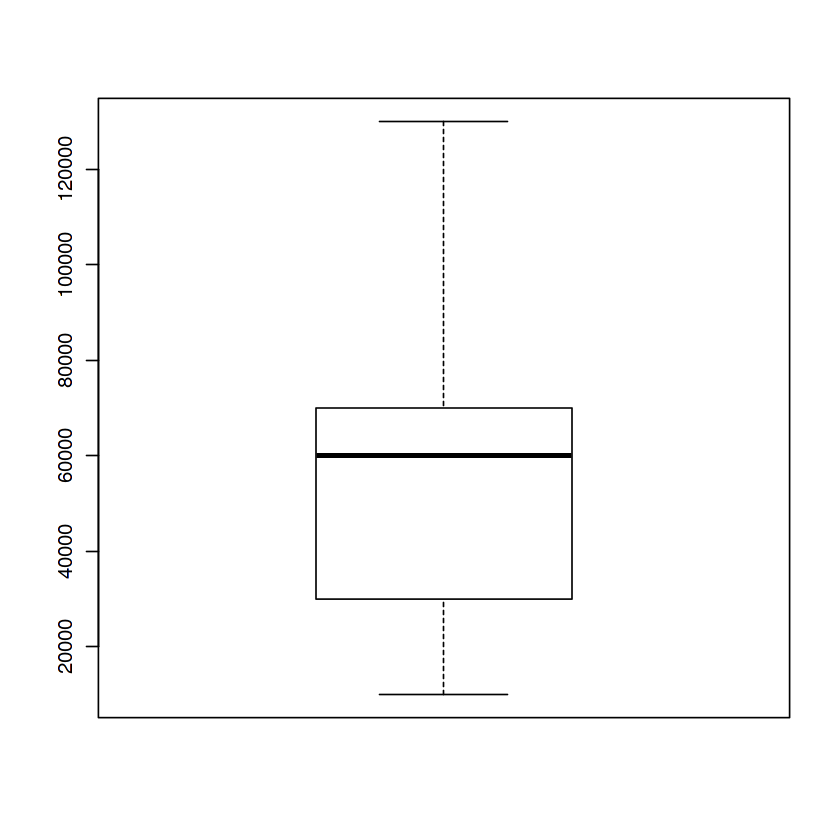

In [33]:
OutVals = boxplot(bike_buyers$Income)$out
print(OutVals)

which(bike_buyers$Income %in% OutVals)

x = bike_buyers$Income [!(bike_buyers$Income %in% OutVals) ]
boxplot(x)

### Note

This is the first time I tried EDA in R and thus, the visualizations are basic in nature. I am hoping to work on them and find better visuals to represent data. Do share your reviews in the comments. Also share any resources for EDA, happy Kaggling :)

Here are some additional resources - 
* https://www.r-bloggers.com/2016/12/7-visualizations-you-should-learn-in-r/
* https://towardsdatascience.com/a-guide-to-data-visualisation-in-r-for-beginners-ef6d41a34174
* https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
* http://qsel.columbia.edu/formhub.R/demo/RemoveOutliers.html